импорт всех нужных библиотек

In [1]:
import torch
import sys
import os
from model import Trainer,QuantumModel

import matplotlib.pyplot as plt
#путь к корню директории
#from setting import BASE_DIR
BASE_DIR = os.path.dirname(os.path.dirname(os.getcwd()))
sys.path.append(os.path.abspath(BASE_DIR))
from data_preparation import PreparationDataset
from show_analysis import LossVisualizer
from model_history import ModelHistory

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


Загрузка и подготовка данных для анализа и обучения модели.<br>
разбиение на train,test


In [2]:
path = BASE_DIR + '\data_all'  # Путь к данным
PD = PreparationDataset(path)

# параметры подготовки данных
pd_params = (10,9,50,1)
window_size,num_features,downsample_step,target_window_size = pd_params 

# Подготовка данных
X, y, df = PD.vec_to_vec(
    window_size,
    num_features,
    downsample_step,
    target_window_size,
    device=device  
)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = PD.PDtrain_test_split(
    X, y, test_size=0.33, random_state=42
)

In [3]:
head = 16
hid_q = 16
hid_l = 128
dropout_rate = 0.3
#инициализация модели
model = QuantumModel( 
    in_features = X_train.shape[1], # window_size*num_features - 1
    out_features = target_window_size,
    head = head,
    hid_q=hid_q,
    hid_l=hid_l,
    dropout_rate=dropout_rate,
    device = device)

trainer = Trainer(
    model=model,
    learning_rate=0.001,
    inf_per_epoch = 5,
    device= device
)

In [4]:
history = trainer.fit(
    X=X_train,
    y=y_train,
    X_t=X_test,
    y_t=y_test,
    batch_size=32,
    epochs=20,
    loss_tube=5,
)

Epoch 5
Main: 0.446627, MAPE: 0.216780
Test - MAPE: 0.167107, Tube: 0.234040
Epoch 10
Main: 0.370872, MAPE: 0.172442
Test - MAPE: 0.126480, Tube: 0.229173
Epoch 15
Main: 0.313170, MAPE: 0.136793
Test - MAPE: 0.113103, Tube: 0.255940
Epoch 20
Main: 0.307490, MAPE: 0.133023
Test - MAPE: 0.100302, Tube: 0.269969


In [6]:
MH = ModelHistory(history)
MH.save_history_json(filename = BASE_DIR+'\loss_history/all_loss.json',model_name = 'EARLY_QUANT')

In [7]:
key = MH.add_result(
        filename = BASE_DIR+'\\resualt/main.json',
        model_name = 'EARLY_QUANT',
        result = 'best',
        message = 'test learning',
        params = {
                'in_features': X_train.shape[1], # window_size*num_features - 1
                'out_features': target_window_size,
                'head': head,
                'hid_q':hid_q,
                'hid_l':hid_l,
                'dropout_rate':dropout_rate,
                'lr':0.001,
                'batch_size':32}
        )
key

18


'409566f2-ebcf-4a81-ac09-9f7e26bf6ad4'

In [8]:
LV = LossVisualizer(history)

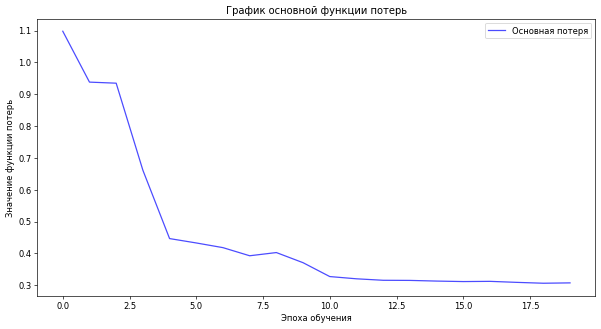

In [9]:
LV.show_training_loss()

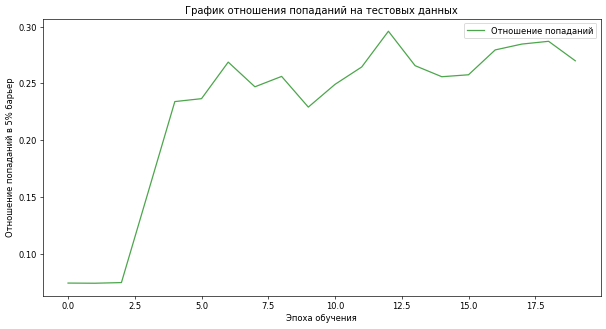

In [10]:
LV.show_test_tube()

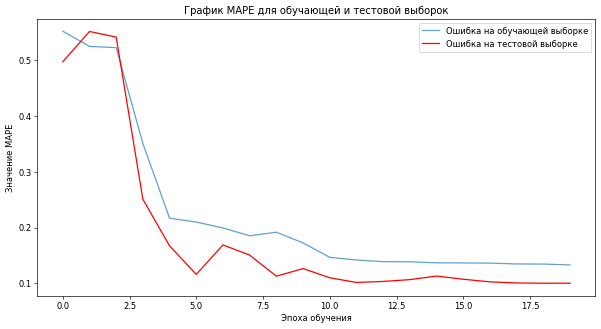

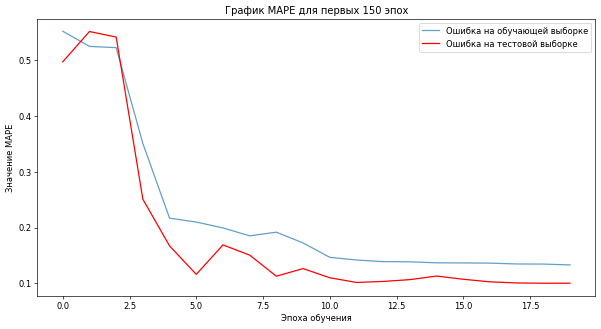

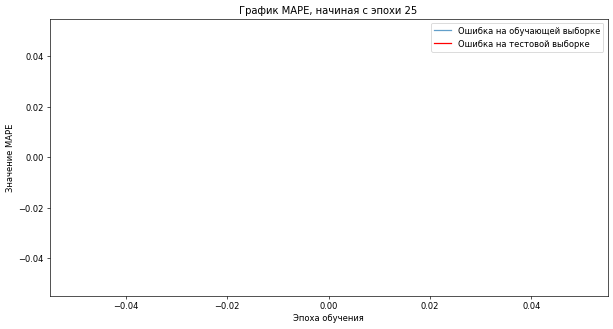

In [11]:
LV.show_mape(start_epoch = 25)

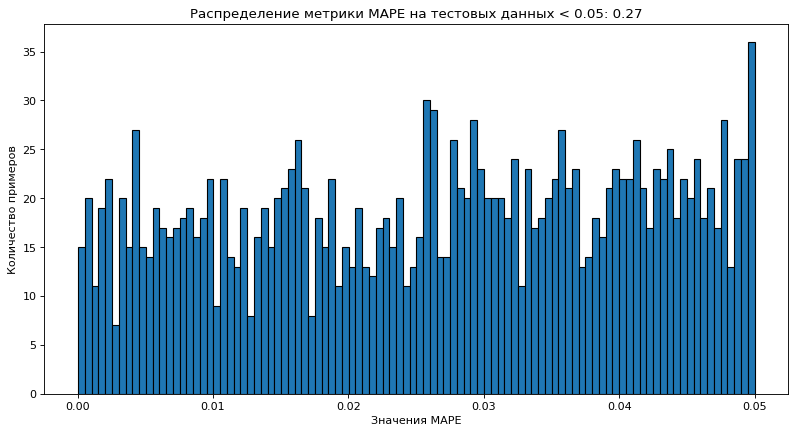

Процент значений MAPE < 0.05: 0.27


In [14]:
LV.histogram_mape(model,X_test,y_test,limit_percel = 5)

Количество записей: 5334


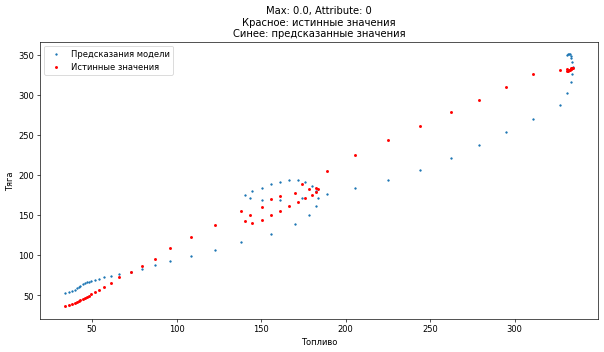

Количество записей: 5334


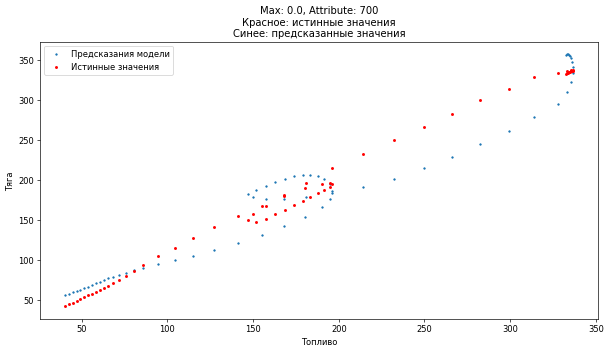

Количество записей: 5334


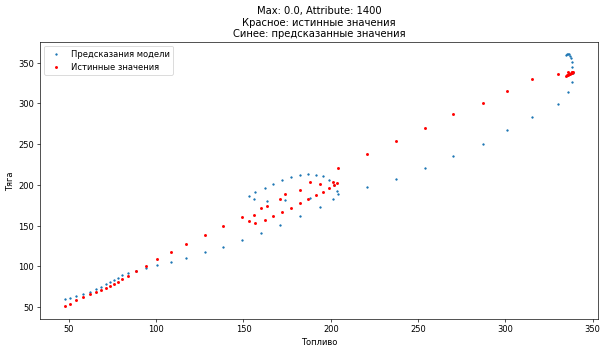

Количество записей: 5334


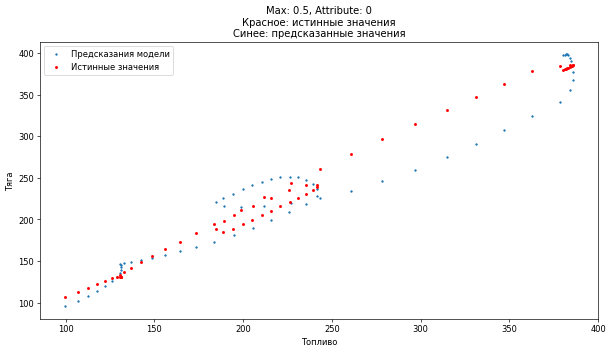

Количество записей: 5334


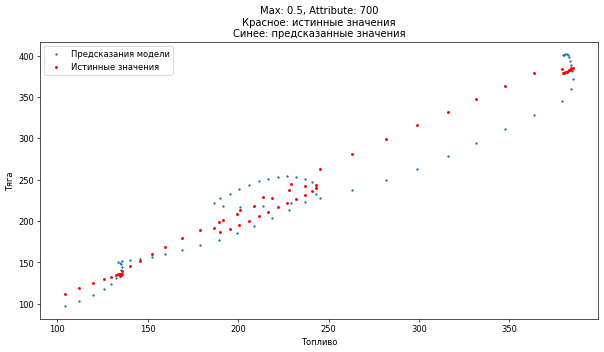

Количество записей: 5334


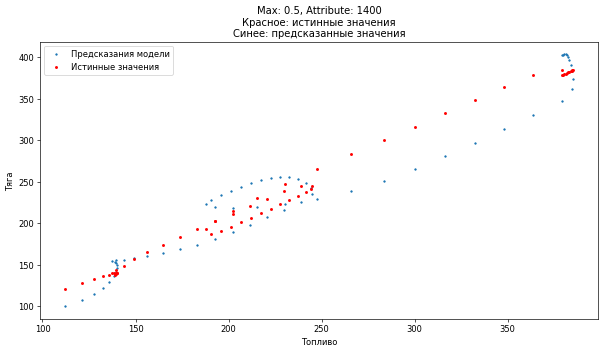

Количество записей: 5334


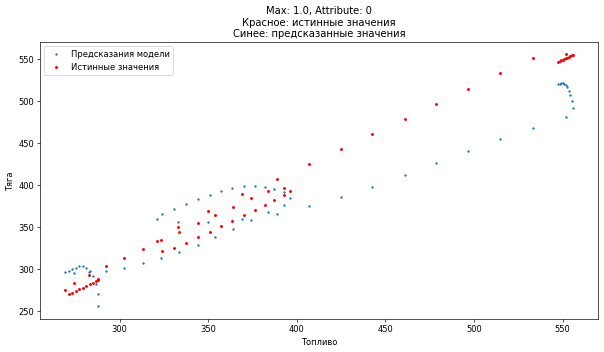

Количество записей: 5334


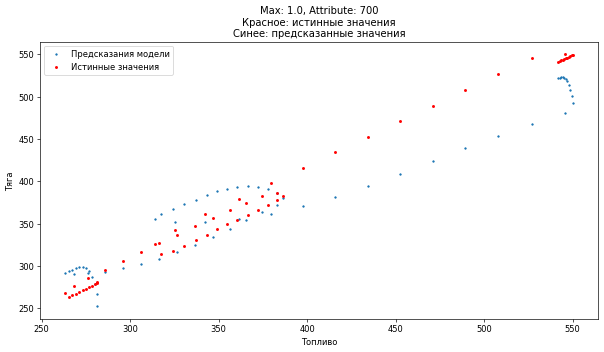

Количество записей: 5334


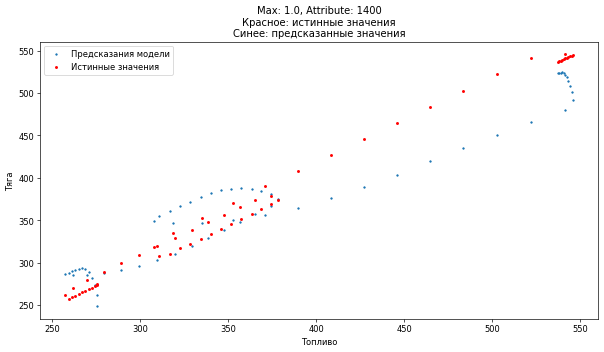

In [13]:
LV.show_predictions(model,df,pd_params,keras = False,device=device)